In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../..")

import torch
import torch.nn as nn
from src.data import make_dataset
from pathlib import Path

In [7]:
datadir = Path("../../data/raw/")
train_dataloader, test_dataloader = make_dataset.get_MNIST(datadir, batch_size=64) 

In [146]:
from src.models import imagemodels

# model = imagemodels.CNN(num_classes=10)
model = imagemodels.NeuralNetwork(10)
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer.param_groups[0]["lr"]

0.001

In [147]:
from src.models import train_model

log_lr, losses, diff_coords, momentum = train_model.find_lr(
    model=model,
    loss_fn=loss_fn,
    optimizer=optimizer,
    data_loader=train_dataloader,
)


 66%|██████▌   | 620/938 [00:07<00:03, 85.30it/s]


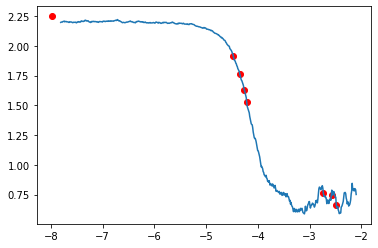

In [148]:
import matplotlib.pyplot as plt
coords =  list(zip(*diff_coords))
plt.scatter(coords[0], coords[1], color="r")
plt.plot(log_lr[10:], losses[10:])

array([ 0.06398778,  0.02088478,  0.00642192,  0.01641288, -0.00071771,
        0.01986958,  0.016845  ,  0.00976126, -0.0295175 ])

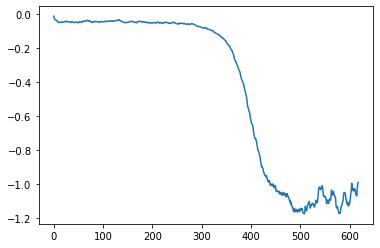

In [149]:
plt.plot(momentum)